# Adult Census Income

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US.
These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. 
The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 
People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. 
That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


As the problem of inequality of income has become very prominent over the years, governments of different
countries have been trying to address the problem so as to improve the economic stability of a nation.
In this study, Machine Learning Classification techniques is used in order to predict whether a person's
yearly income falls in the income category of either greater than 50K Dollars or less then equal to 50K
Dollars category based on a certain set of attributes. An analysis of this kind helps to figure out which
individual attributes are necessary in improving an individual's income so that focus can be put on those
specific factors so as to level up the income of individuals

In [1]:

#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\Shivaraj choutagi\Downloads\archive\adult.csv')

In [4]:
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32561, 15)

In [8]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [9]:
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [10]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
df['education'].value_counts()


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [13]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [14]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [15]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [17]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [18]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [19]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [20]:
categorical_col = [i for i in df.columns if df[i].dtype =='O']


In [21]:
categorical_col

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [22]:
numeric_col= [i for i in df.columns if df[i].dtype !='O']

In [23]:
numeric_col

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [24]:
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

# EDA

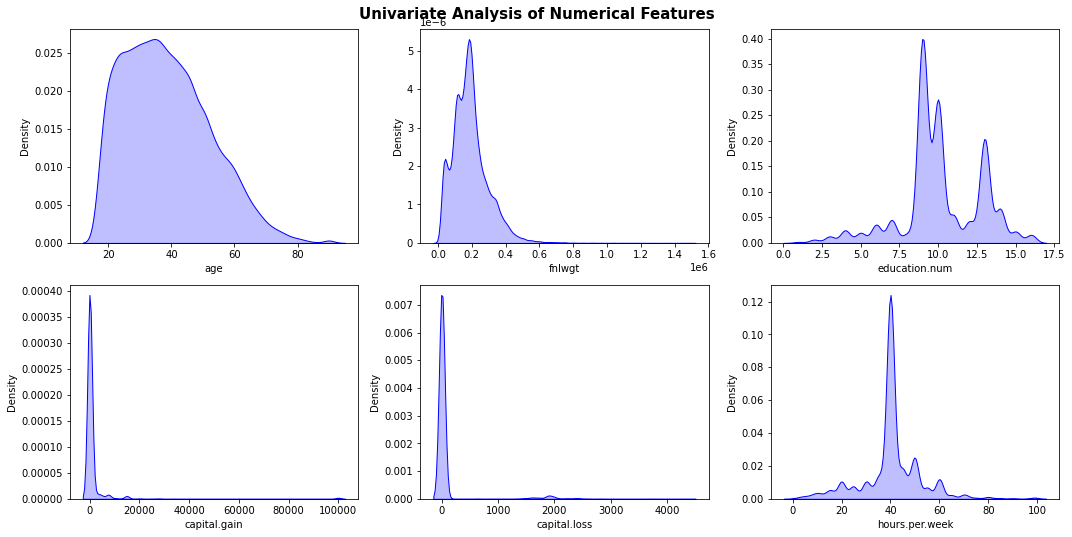

In [25]:
#univariate analysis

plt.figure(figsize=(15,18), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=15,fontweight='bold')
for i in range(0, len(numeric_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_col[i]],shade = True, color='b',data=df)
    plt.xlabel(numeric_col[i])
    plt.tight_layout()


1. Age is aprroximately normally distributed.
2. Final weight,capital loss & capital gain are heavily right skewed.


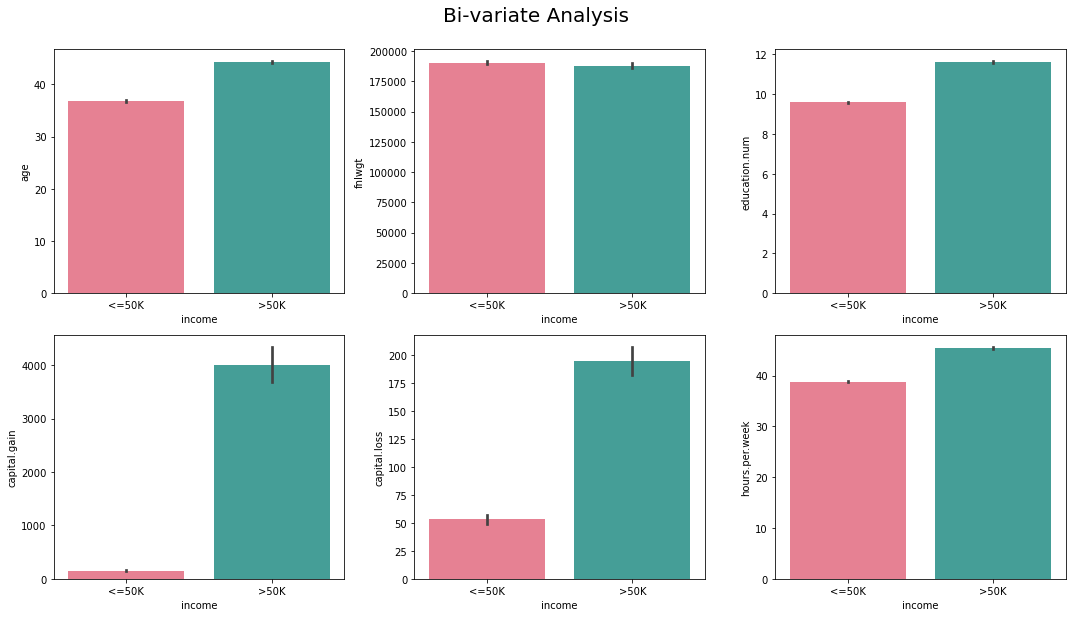

In [26]:

plt.figure(figsize=(15,20))
plt.suptitle('Bi­variate Analysis', fontsize=20, alpha=1, y=1)
for i in range(0, len(numeric_col)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numeric_col [i], x='income', data = df,palette ="husl")
    plt.tight_layout()

1. The bar plot above are bivariate plots.
2. In terms of age, older the person, more is the probability of income getting higher.
3. Capital gain and capital loss are more experienced by people having higher income.
4. The hours per week put into work directly provides an outcome of higher income.


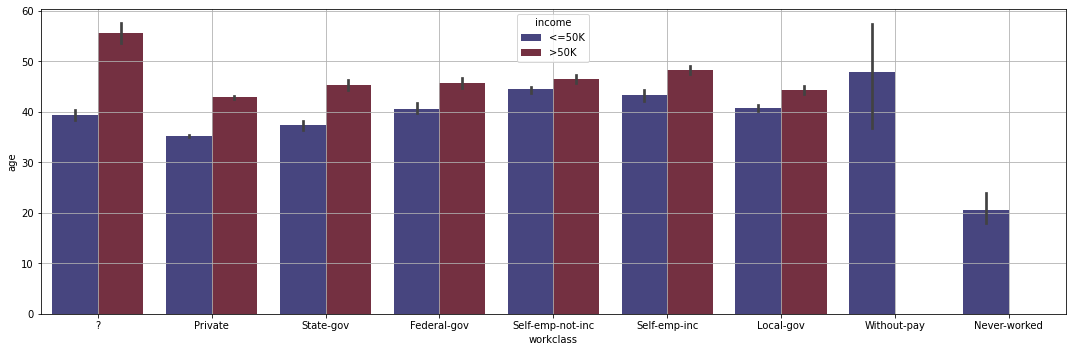

In [27]:

plt.figure(figsize=(15,5))
sns.barplot(x='workclass',y='age',hue='income',data=df,palette='icefire',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

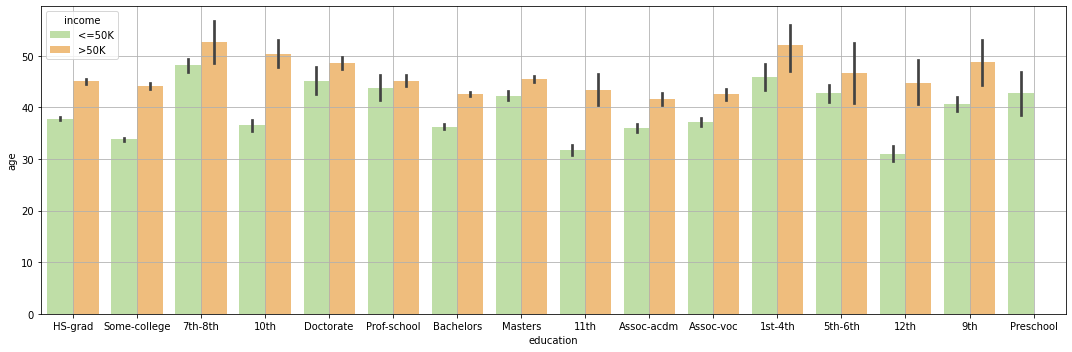

In [28]:

#who have completed doctorate.
plt.figure(figsize=(15,5))
sns.barplot(x='education',y='age',hue='income',data=df,palette='Spectral_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()


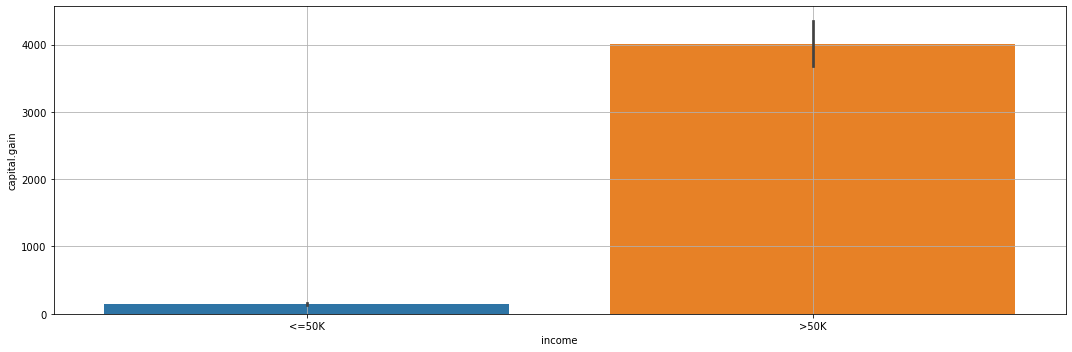

In [29]:

plt.figure(figsize=(15,5))
sns.barplot(x='income',y='capital.gain',data=df,saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

Capital gain & Capital loss is extremely high for the people earning more than $50K.


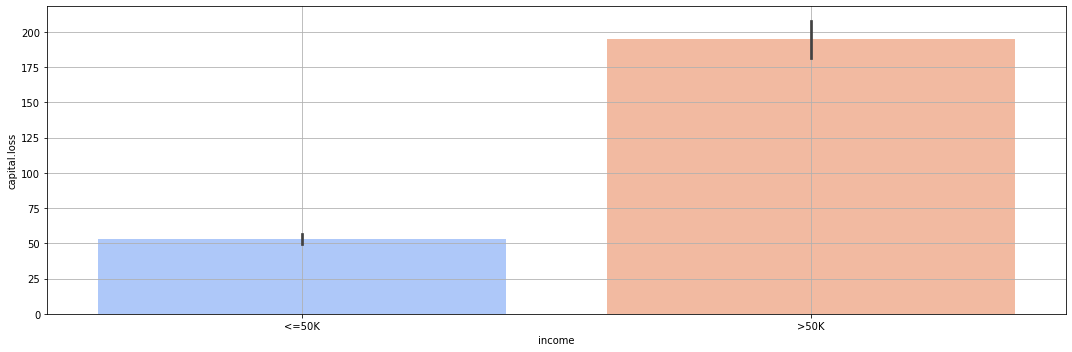

<AxesSubplot:xlabel='race', ylabel='count'>

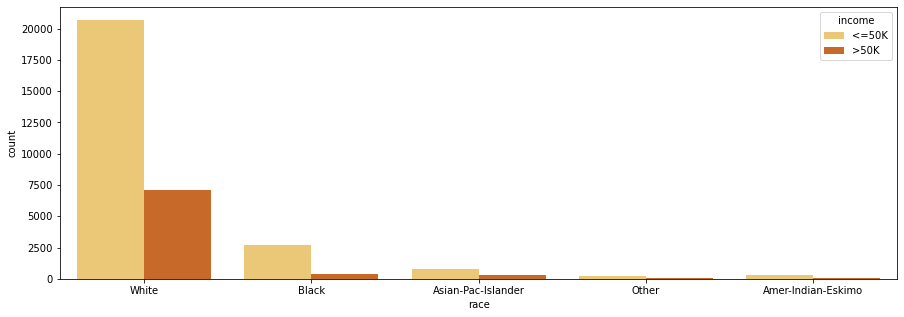

In [30]:

plt.figure(figsize=(15,5))
sns.barplot(x='income',y='capital.loss',data=df,saturation=0.9,palette="coolwarm")
plt.tight_layout()
plt.grid(True)
plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='race', hue='income', data=df,palette="YlOrBr")



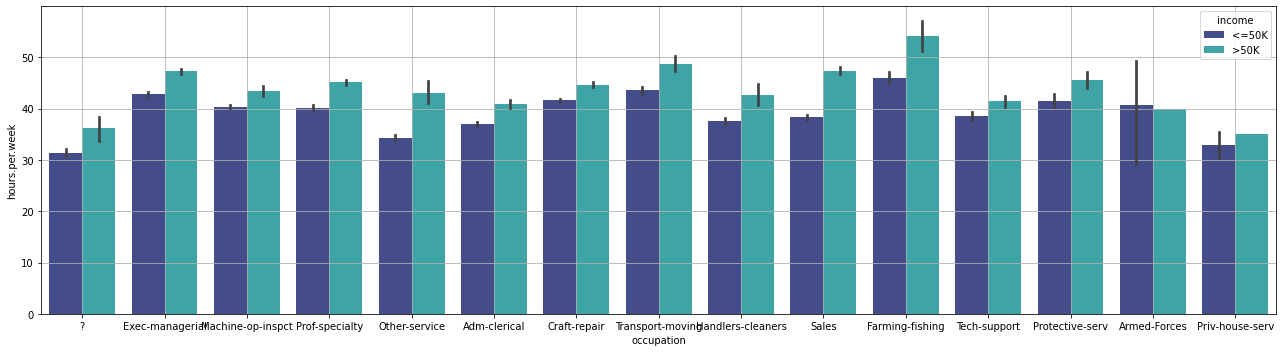

<AxesSubplot:xlabel='sex', ylabel='count'>

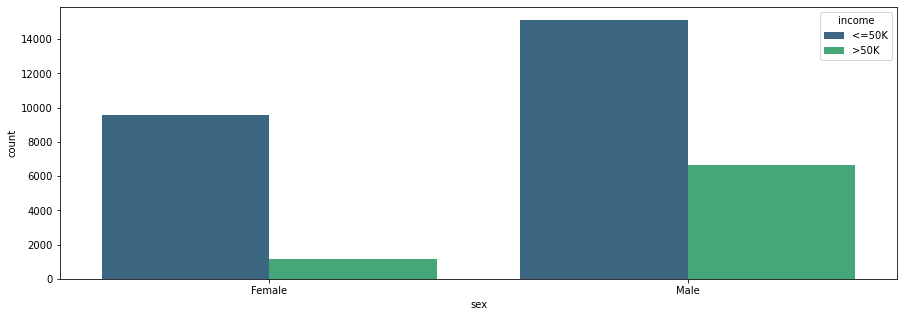

In [31]:

plt.figure(figsize=(18,5))
sns.barplot(x='occupation',y='hours.per.week',hue='income',data=df,palette='mako',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()


# Males earn comparitively more then $50K as compared ot their females counterpart.
plt.figure(figsize=(15,5))
sns.countplot(x='sex', hue= "income",data=df,palette="viridis")

1. The primary sector occupation of farming‑fishing which requires maximum amount of work to be put in
in terms of hours has a category of the most no of people having low income and high income as
compared to other occupations.
2. The income exceeding $ 50K mostly has people from Transportation sector,people in sales and people
of Executive managerial positions & professor ranks.

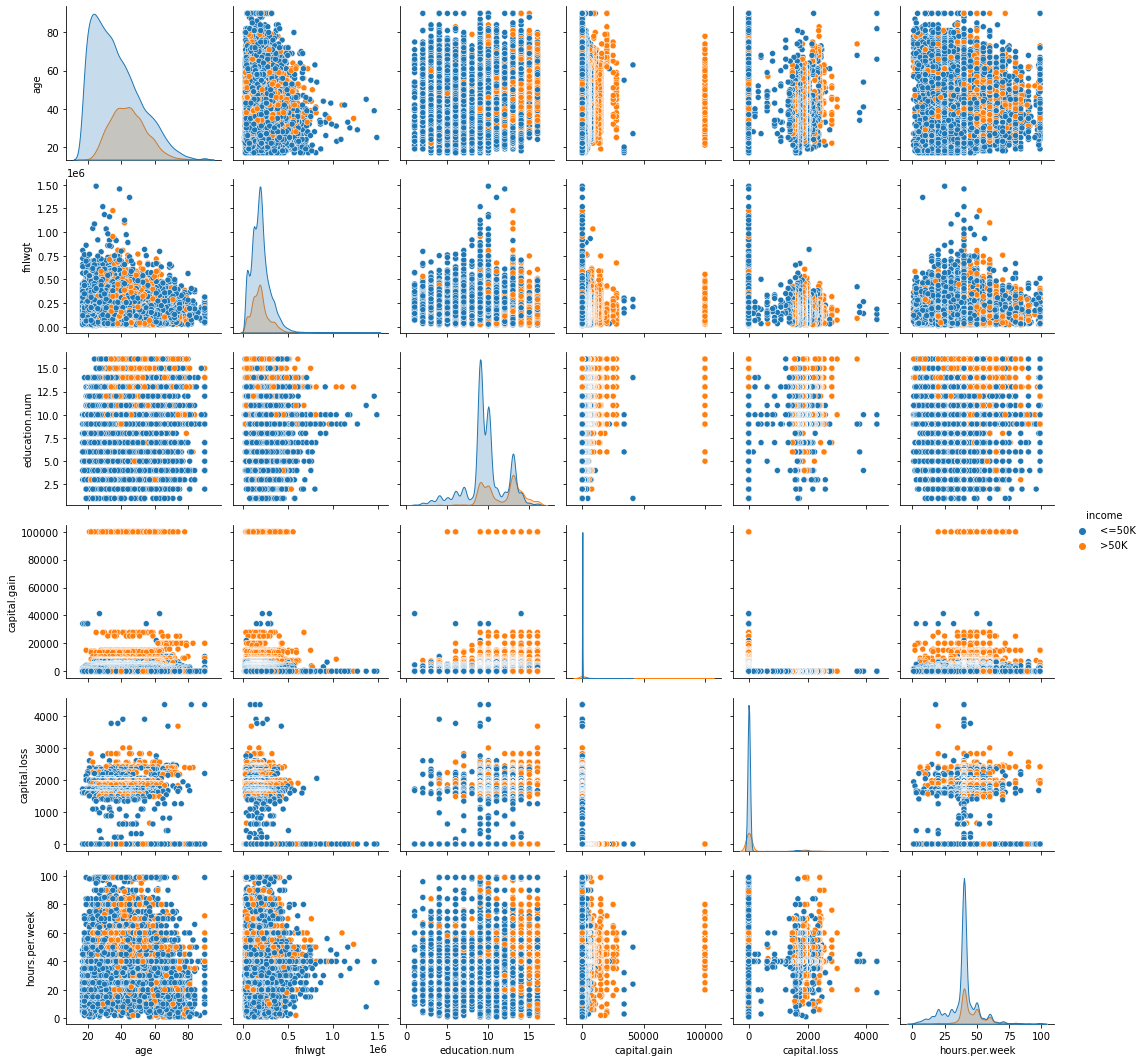

In [32]:
sns.pairplot(df,hue="income")
plt.show()

<AxesSubplot:xlabel='marital.status', ylabel='count'>

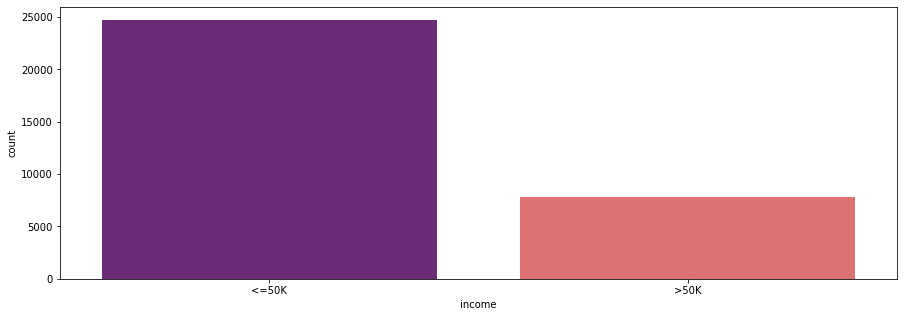

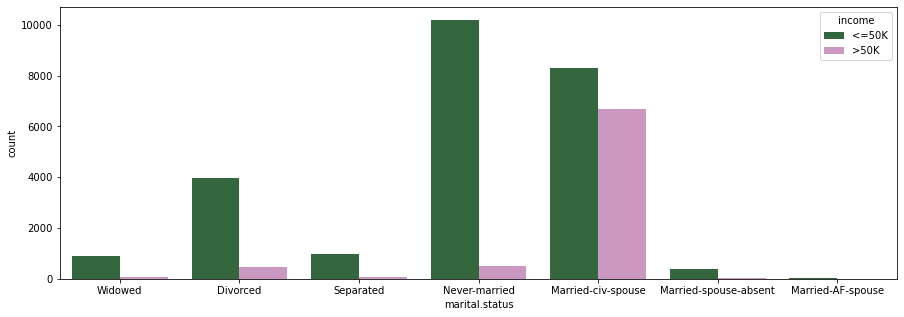

In [33]:
#in the dataset earning more than $50K.
plt.figure(figsize=(15,5))
sns.countplot(x='income', data=df,palette="magma")

plt.figure(figsize=(15,5))
sns.countplot(x='marital.status',hue='income', data=df,palette ="cubehelix")



# Feature Engineering


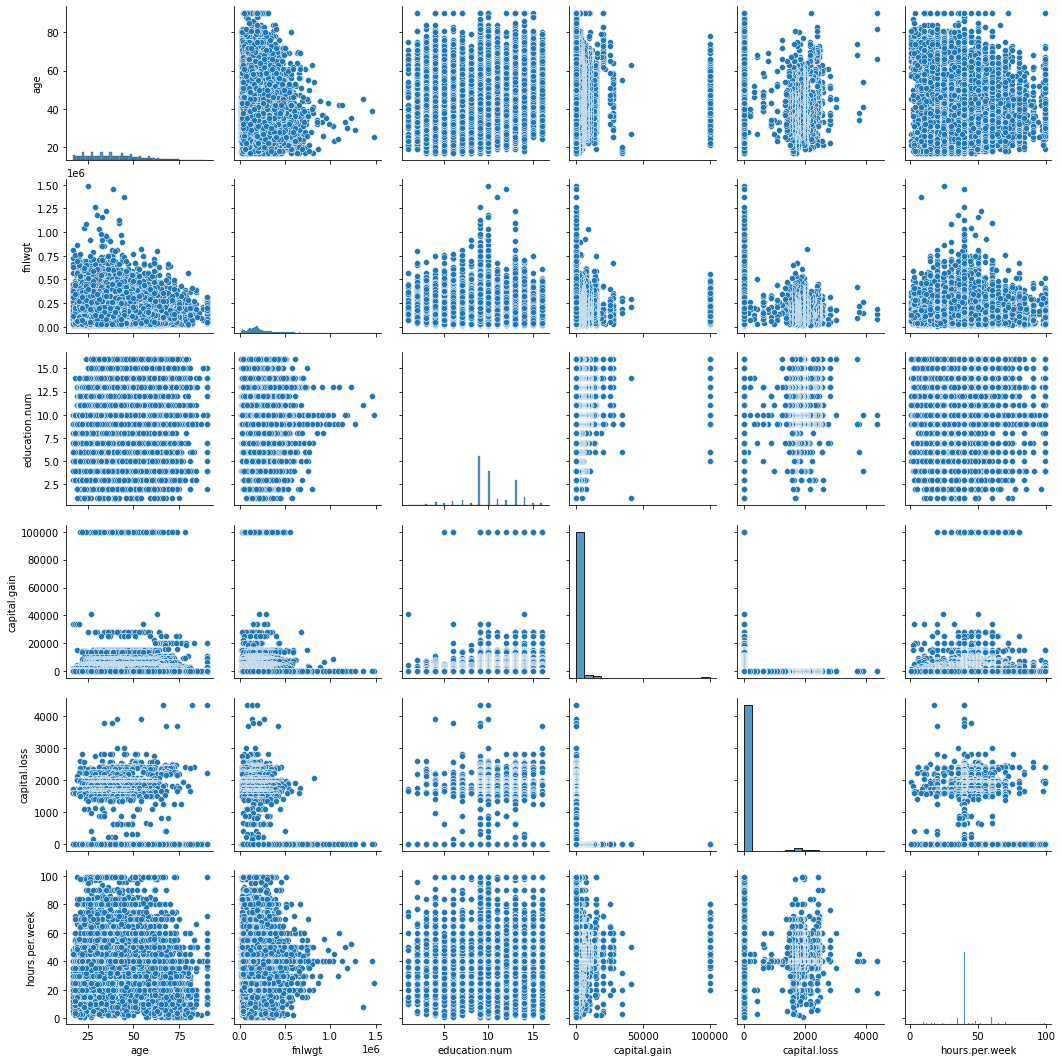

In [34]:
sns.pairplot(df)

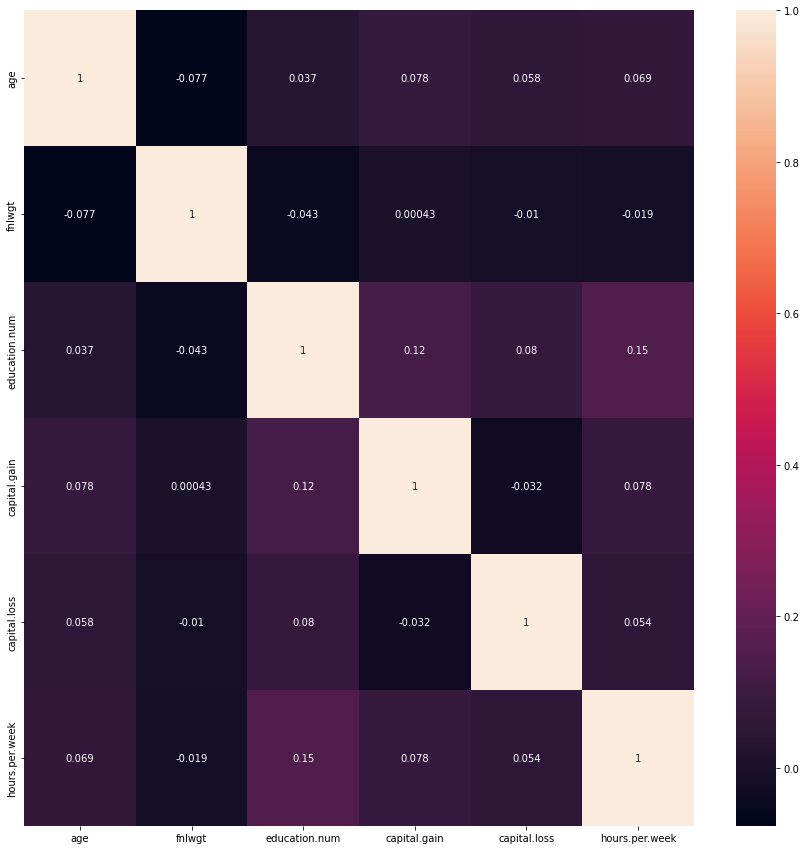

In [35]:
# Checking the correlation between the features
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True)
plt.show()


there is no correlATION between features

In [36]:
#replacing "?" with np.nan
df.replace("?", np.NaN, inplace = True)
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [37]:
#replacing nan with forward & backward values
df['workclass'] =df['workclass'].fillna(method ='bfill')
df['occupation'] =df['occupation'].fillna(method ='bfill')
df['native.country'] =df['native.country'].fillna(method ='pad')
df.head()


age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0    Exec-managerial  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2  Machine-op-inspct      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [38]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [39]:
df.duplicated().sum()

24

In [40]:

df.nunique()


age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [41]:
df=df.drop_duplicates( keep='last')

In [42]:
df.duplicated().sum()

0

In [43]:
#boxplot

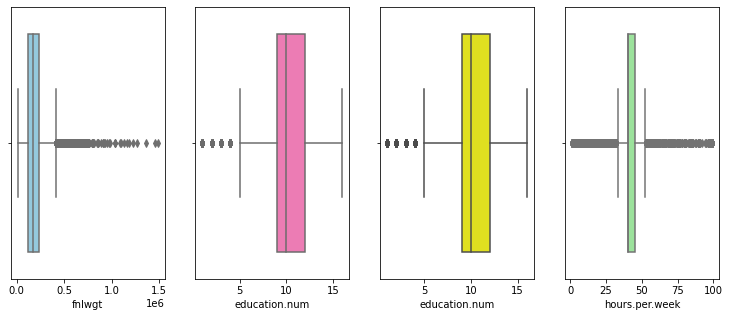

In [44]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(151)
sns.boxplot(df['fnlwgt'],color='skyblue')
plt.subplot(152)
sns.boxplot(df['education.num'],color='hotpink')
plt.subplot(153)
sns.boxplot(df['education.num'],color='yellow')
plt.subplot(154)
sns.boxplot(df['hours.per.week'],color='lightgreen')
plt.show()

In [45]:
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90   Private   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66   Private  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0        Exec-managerial  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2      Machine-op-inspct      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32537 rows x 15 columns]

In [46]:
numeric_col=[col for col in df.columns if df[col].dtype!='O']
num_df = df[numeric_col]
num_df.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
0   90   77053              9             0          4356              40
1   82  132870              9             0          4356              18
2   66  186061             10             0          4356              40
3   54  140359              4             0          3900              40
4   41  264663             10             0          3900              40

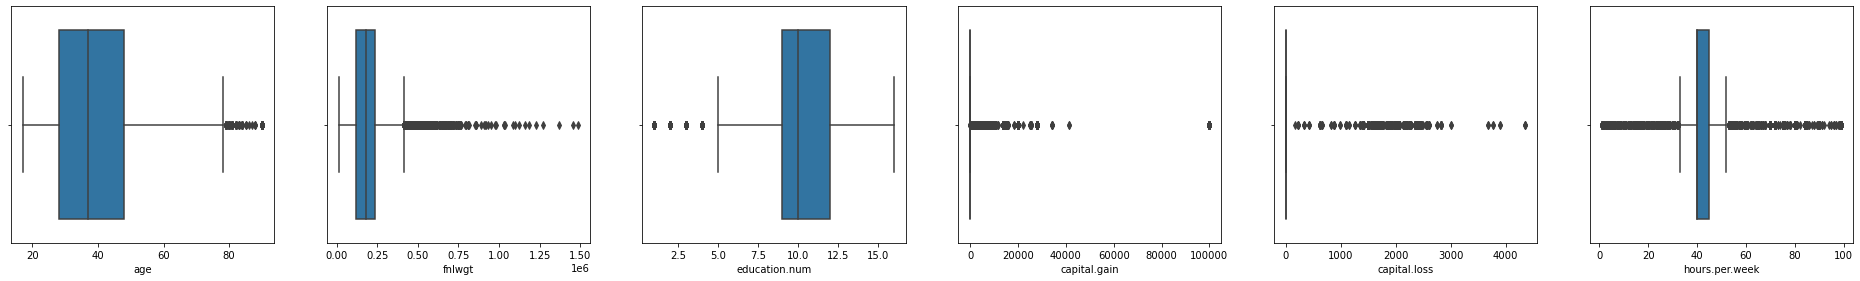

In [47]:
plt.figure(figsize=(50,20))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

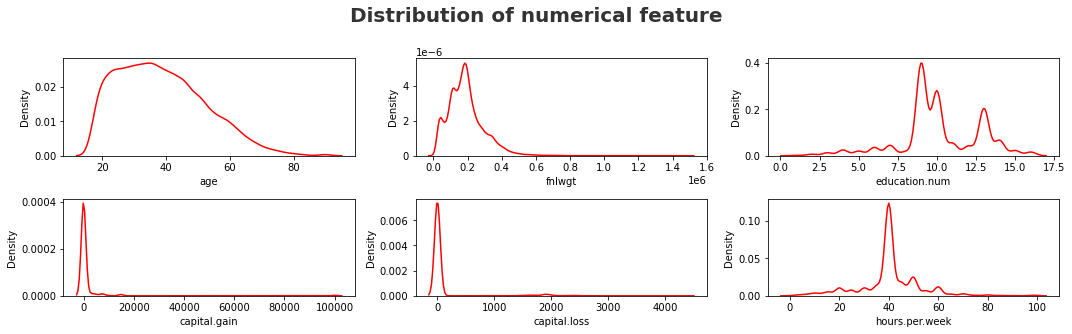

In [48]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='red')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [49]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [50]:
outlier_thresholds(num_df,num_df.columns)

(age                  -32.0
 fnlwgt           -329273.0
 education.num         -2.0
 capital.gain           0.0
 capital.loss           0.0
 hours.per.week       -22.5
 dtype: float64,
 age                  112.0
 fnlwgt            724053.4
 education.num         22.0
 capital.gain           0.0
 capital.loss           0.0
 hours.per.week       101.5
 dtype: float64)

# Treating outliers with their lower and upper limit

In [51]:
df.head(30)

age         workclass  fnlwgt     education  education.num  \
0    90           Private   77053       HS-grad              9   
1    82           Private  132870       HS-grad              9   
2    66           Private  186061  Some-college             10   
3    54           Private  140359       7th-8th              4   
4    41           Private  264663  Some-college             10   
5    34           Private  216864       HS-grad              9   
6    38           Private  150601          10th              6   
7    74         State-gov   88638     Doctorate             16   
8    68       Federal-gov  422013       HS-grad              9   
9    41           Private   70037  Some-college             10   
10   45           Private  172274     Doctorate             16   
11   38  Self-emp-not-inc  164526   Prof-school             15   
12   52           Private  129177     Bachelors             13   
13   32           Private  136204       Masters             14   
14   51           Private  172175     Doctorate             16   
15   46           Private   45363   Prof-school             15   
16   45           Private  172822          11th              7   
17   57           Private  317847       Masters             14   
18   22           Private  119592    Assoc-acdm             12   
19   34           Private  203034     Bachelors             13   
20   37           Private  188774     Bachelors             13   
21   29           Private   77009          11th              7   
22   61           Private   29059       HS-grad              9   
23   51           Private  153870  Some-college             10   
24   61           Private  135285       HS-grad              9   
25   21           Private   34310     Assoc-voc             11   
26   33           Private  228696       1st-4th              2   
27   49           Private  122066       5th-6th              3   
28   37      Self-emp-inc  107164          10th              6   
29   38           Private  175360          10th              6   

        marital.status         occupation    relationship   race     sex  \
0              Widowed    Exec-managerial   Not-in-family  White  Female   
1              Widowed    Exec-managerial   Not-in-family  White  Female   
2              Widowed  Machine-op-inspct       Unmarried  Black  Female   
3             Divorced  Machine-op-inspct       Unmarried  White  Female   
4            Separated     Prof-specialty       Own-child  White  Female   
5             Divorced      Other-service       Unmarried  White  Female   
6            Separated       Adm-clerical       Unmarried  White    Male   
7        Never-married     Prof-specialty  Other-relative  White  Female   
8             Divorced     Prof-specialty   Not-in-family  White  Female   
9        Never-married       Craft-repair       Unmarried  White    Male   
10            Divorced     Prof-specialty       Unmarried  Black  Female   
11       Never-married     Prof-specialty   Not-in-family  White    Male   
12             Widowed      Other-service   Not-in-family  White  Female   
13           Separated    Exec-managerial   Not-in-family  White    Male   
14       Never-married     Prof-specialty   Not-in-family  White    Male   
15            Divorced     Prof-specialty   Not-in-family  White    Male   
16            Divorced   Transport-moving   Not-in-family  White    Male   
17            Divorced    Exec-managerial   Not-in-family  White    Male   
18       Never-married  Handlers-cleaners   Not-in-family  Black    Male   
19           Separated              Sales   Not-in-family  White    Male   
20       Never-married    Exec-managerial   Not-in-family  White    Male   
21           Separated              Sales   Not-in-family  White  Female   
22            Divorced              Sales       Unmarried  White  Female   
23  Married-civ-spouse   Transport-moving         Husband  White    Male   
24  Married-civ-spouse       Craft-repair         Husband

In [52]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
## function to remove outliers
def replace_with_thresholds(dataframe,columns):
    for col in columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
replace_with_thresholds(df,num_df)

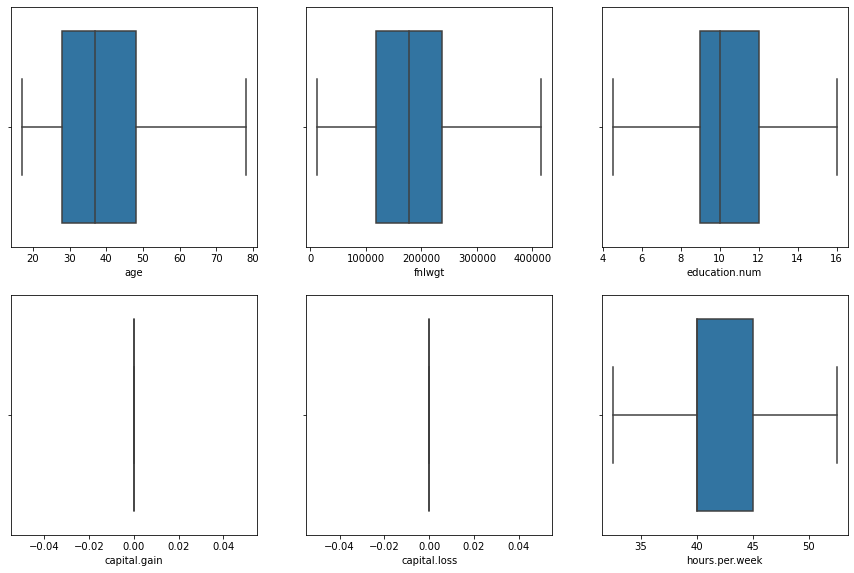

In [53]:
plt.figure(figsize=(15,15))
for i in range(len(numeric_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[numeric_col[i]])


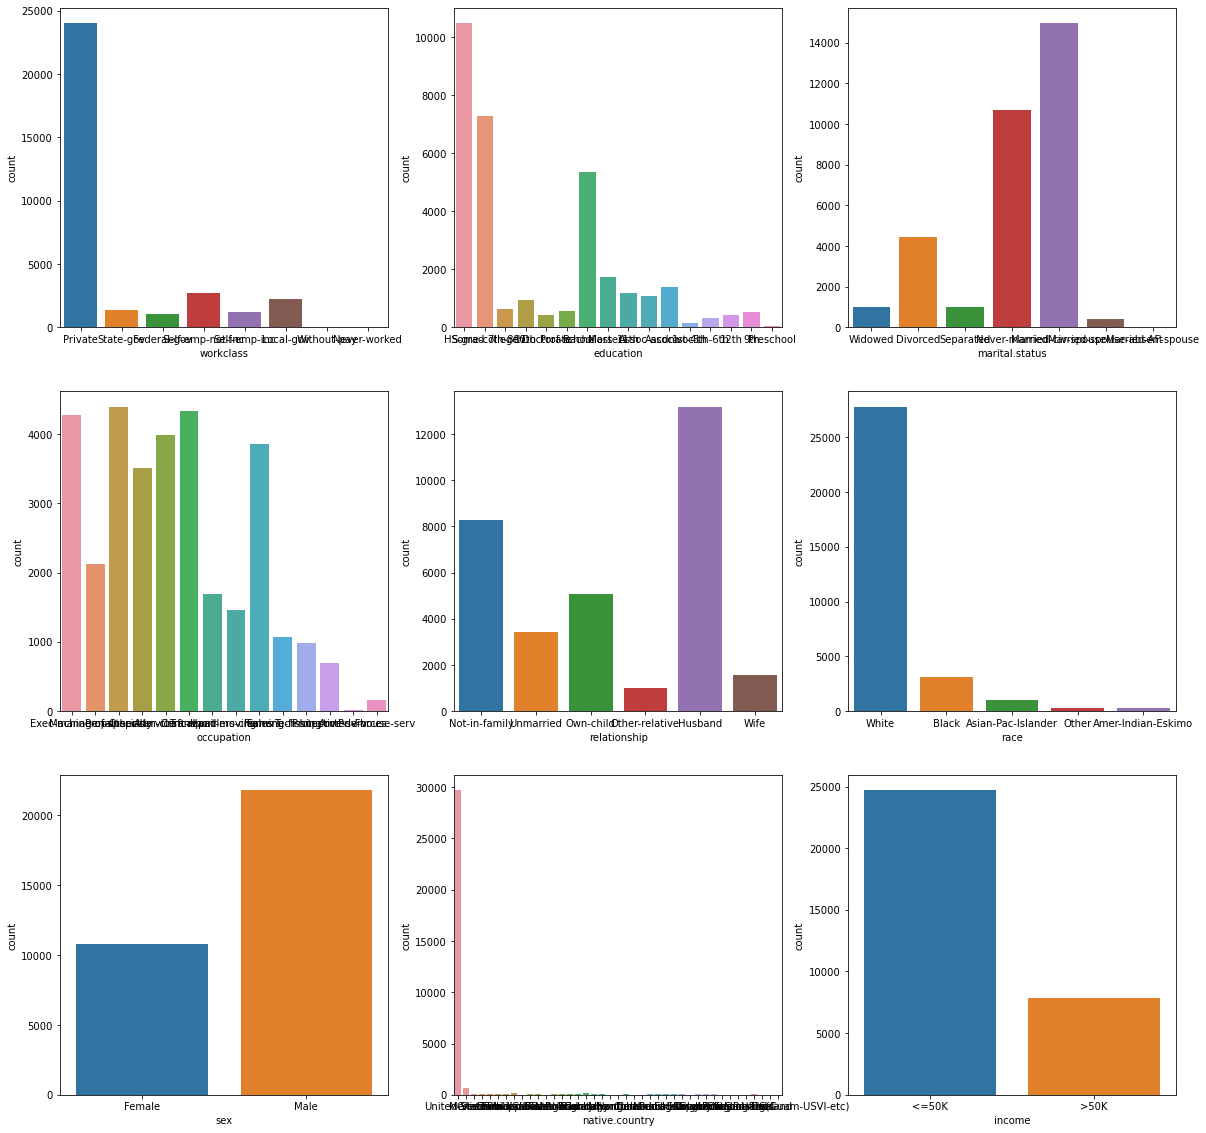

In [54]:
#categorical features disrtibution
plt.figure(figsize=(20,20))
for i in range(len(categorical_col)):
    plt.subplot(3,3,i+1)
    sns.countplot(df[categorical_col[i]])

In [55]:
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       78   Private   77053       HS-grad            9.0             Widowed   
1       78   Private  132870       HS-grad            9.0             Widowed   
2       66   Private  186061  Some-college           10.0             Widowed   
3       54   Private  140359       7th-8th            4.5            Divorced   
4       41   Private  264663  Some-college           10.0           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college           10.0       Never-married   
32557   27   Private  257302    Assoc-acdm           12.0  Married-civ-spouse   
32558   40   Private  154374       HS-grad            9.0  Married-civ-spouse   
32559   58   Private  151910       HS-grad            9.0             Widowed   
32560   22   Private  201490       HS-grad            9.0       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0        Exec-managerial  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2      Machine-op-inspct      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0                 0            40.0  United-States  <=50K  
1                 0            32.5  United-States  <=50K  
2                 0            40.0  United-States  <=50K  
3                 0            40.0  United-States  <=50K  
4                 0            40.0  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0            40.0  United-States  <=50K  
32557             0            38.0  United-States  <=50K  
32558             0            40.0  United-States   >50K  
32559             0            40.0  United-States  <=50K  
32560             0            32.5  United-States  <=50K  

[32537 rows x 15 columns]

# Encoading

In [56]:

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [57]:
x=df.drop(['relationship','occupation','income','native.country'],axis=1)

In [58]:
x

age workclass  fnlwgt     education  education.num      marital.status  \
0       78   Private   77053       HS-grad            9.0             Widowed   
1       78   Private  132870       HS-grad            9.0             Widowed   
2       66   Private  186061  Some-college           10.0             Widowed   
3       54   Private  140359       7th-8th            4.5            Divorced   
4       41   Private  264663  Some-college           10.0           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college           10.0       Never-married   
32557   27   Private  257302    Assoc-acdm           12.0  Married-civ-spouse   
32558   40   Private  154374       HS-grad            9.0  Married-civ-spouse   
32559   58   Private  151910       HS-grad            9.0             Widowed   
32560   22   Private  201490       HS-grad            9.0       Never-married   

        race     sex  capital.gain  capital.loss  hours.per.week  
0      White  Female             0             0            40.0  
1      White  Female             0             0            32.5  
2      Black  Female             0             0            40.0  
3      White  Female             0             0            40.0  
4      White  Female             0             0            40.0  
...      ...     ...           ...           ...             ...  
32556  White    Male             0             0            40.0  
32557  White  Female             0             0            38.0  
32558  White    Male             0             0            40.0  
32559  White  Female             0             0            40.0  
32560  White    Male             0             0            32.5  

[32537 rows x 11 columns]

In [59]:
y=df.income

In [60]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32537, dtype: object

# Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=0.2)

In [63]:

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [64]:
edu=['Bachelors', 'HS-grad', 'Assoc-voc', 'Some-college', 'Assoc-acdm','12th', '11th', 'Masters', '10th', 'Prof-school', '5th-6th', '7th-8th', 'Doctorate', '9th', '1st-4th', 'Preschool']
werk=['State-gov', 'Private', 'Federal-gov', 'Self-emp-inc','Self-emp-not-inc', 'Local-gov', 'Without-pay', 'Never-worked']
marital=['Widowed', 'Never-married', 'Married-civ-spouse', 'Divorced','Separated', 'Married-spouse-absent', 'Married-AF-spouse']
race=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other']
sex=['Female', 'Male']

In [65]:
ordi=OrdinalEncoder(categories=[edu,werk,marital,race,sex])

In [66]:
ordi.fit(x_train[['education','workclass','marital.status','race','sex']])

OrdinalEncoder(categories=[['Bachelors', 'HS-grad', 'Assoc-voc', 'Some-college',
                            'Assoc-acdm', '12th', '11th', 'Masters', '10th',
                            'Prof-school', '5th-6th', '7th-8th', 'Doctorate',
                            '9th', '1st-4th', 'Preschool'],
                           ['State-gov', 'Private', 'Federal-gov',
                            'Self-emp-inc', 'Self-emp-not-inc', 'Local-gov',
                            'Without-pay', 'Never-worked'],
                           ['Widowed', 'Never-married', 'Married-civ-spouse',
                            'Divorced', 'Separated', 'Married-spouse-absent',
                            'Married-AF-spouse'],
                           ['White', 'Black', 'Asian-Pac-Islander',
                            'Amer-Indian-Eskimo', 'Other'],
                           ['Female', 'Male']])

In [67]:
ordi.transform(x_train[['education','workclass','marital.status','race','sex']])

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 2.,  1.,  2.,  0.,  1.],
       ...,
       [ 3.,  1.,  1.,  0.,  1.],
       [10.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.]])

In [68]:
!pip install category_encoders

In [69]:
# https://contrib.scikit-learn.org/category_encoders/
import category_encoders as ce

In [70]:
x_train.head()

age     workclass  fnlwgt     education  education.num  \
12810   56     State-gov  143931     Bachelors           13.0   
6299    19       Private   55284       HS-grad            9.0   
5170    30       Private  241259     Assoc-voc           11.0   
30159   42   Federal-gov  126320  Some-college           10.0   
1050    35  Self-emp-inc  189404  Some-college           10.0   

           marital.status   race     sex  capital.gain  capital.loss  \
12810             Widowed  White  Female             0             0   
6299        Never-married  White  Female             0             0   
5170   Married-civ-spouse  White    Male             0             0   
30159  Married-civ-spouse  Black    Male             0             0   
1050   Married-civ-spouse  White    Male             0             0   

       hours.per.week  
12810            40.0  
6299             35.0  
5170             40.0  
30159            40.0  
1050             40.0

In [71]:
encoder_feat = ce.OrdinalEncoder(cols =['education','workclass','marital.status','race','sex'])

In [72]:
x_train_ord = x_train.copy()

In [73]:
x_train_ord[['education','workclass','marital.status','race','sex']] = encoder_feat.fit_transform(x_train[['education','workclass','marital.status','race','sex']])
x_train_ord

age  workclass  fnlwgt  education  education.num  marital.status  race  \
12810   56          1  143931          1           13.0               1     1   
6299    19          2   55284          2            9.0               2     1   
5170    30          2  241259          3           11.0               3     1   
30159   42          3  126320          4           10.0               3     2   
1050    35          4  189404          4           10.0               3     1   
...    ...        ...     ...        ...            ...             ...   ...   
500     36          2  386726          8           14.0               3     1   
12090   18          2  163332          2            9.0               2     1   
15292   21          2   56520          4           10.0               2     1   
4517    17          2  270942         11            4.5               2     1   
5925    28          2  291374          2            9.0               2     2   

       sex  capital.gain  capital.loss  hours.per.week  
12810    1             0             0            40.0  
6299     1             0             0            35.0  
5170     2             0             0            40.0  
30159    2             0             0            40.0  
1050     2             0             0            40.0  
...    ...           ...           ...             ...  
500      1             0             0            44.0  
12090    1             0             0            32.5  
15292    2             0             0            40.0  
4517     2             0             0            48.0  
5925     1             0             0            40.0  

[26029 rows x 11 columns]

In [74]:
x_test.head()

age workclass  fnlwgt     education  education.num      marital.status  \
11925   40   Private  186916     Bachelors           13.0  Married-civ-spouse   
11733   37   Private   69481       HS-grad            9.0            Divorced   
27486   31   Private  227446  Some-college           10.0  Married-civ-spouse   
23469   36   Private  183279       HS-grad            9.0  Married-civ-spouse   
9730    48   Private  102112    Assoc-acdm           12.0  Married-civ-spouse   

        race   sex  capital.gain  capital.loss  hours.per.week  
11925  White  Male             0             0            40.0  
11733  White  Male             0             0            40.0  
27486  White  Male             0             0            40.0  
23469  White  Male             0             0            40.0  
9730   White  Male             0             0            50.0

In [75]:
encoder_feat = ce.OrdinalEncoder(cols =['education','workclass','marital.status','race','sex'])

In [76]:
x_test_ord = x_test.copy()

In [77]:
x_test_ord[['education','workclass','marital.status','race','sex']] = encoder_feat.fit_transform(x_test[['education','workclass','marital.status','race','sex']])
x_test_ord

age  workclass  fnlwgt  education  education.num  marital.status  race  \
11925   40          1  186916          1           13.0               1     1   
11733   37          1   69481          2            9.0               2     1   
27486   31          1  227446          3           10.0               1     1   
23469   36          1  183279          2            9.0               1     1   
9730    48          1  102112          4           12.0               1     1   
...    ...        ...     ...        ...            ...             ...   ...   
16584   23          1  203076          3           10.0               3     1   
14732   26          1  245465          4           12.0               3     1   
27769   20          6  183083          3           10.0               3     1   
12143   21          1  109952          7            6.0               1     1   
9537    39          1  166744          2            9.0               3     1   

       sex  capital.gain  capital.loss  hours.per.week  
11925    1             0             0            40.0  
11733    1             0             0            40.0  
27486    1             0             0            40.0  
23469    1             0             0            40.0  
9730     1             0             0            50.0  
...    ...           ...           ...             ...  
16584    1             0             0            40.0  
14732    1             0             0            32.5  
27769    2             0             0            32.5  
12143    1             0             0            50.0  
9537     2             0             0            38.0  

[6508 rows x 11 columns]

In [78]:

from sklearn.preprocessing import LabelEncoder


In [79]:

le = LabelEncoder()

In [80]:
le.fit(y_train)

LabelEncoder()

In [81]:

le.classes_


array(['<=50K', '>50K'], dtype=object)

In [82]:

y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [83]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
y_train.shape

(26029,)

# standardize the datasets

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [87]:
x_train = scaler.fit_transform(x_train_ord)

In [88]:
x_test = scaler.transform(x_test_ord)

In [89]:
x_test.shape

(6508, 11)

In [90]:
x_train.shape

(26029, 11)

# We are saving our preprocessing model in physcial file so we donot need to preprocess our data again and again before giving to model.


In [91]:
preprocess_model = [x_train,y_train,x_test,y_test]

In [92]:
import pickle


In [93]:
pickle.dump(preprocess_model, open('preprocess_model.pkl','wb'))

In [94]:
#load our model from pickle file
preprocess_model = pickle.load(open('preprocess_model.pkl','rb'))

we have successfully stored our scaled data into pickel file so we can use it further in other file by just importing it.

# Now we are saving data in NoSQL database mongodb after preprocessing


In [95]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [96]:
preprocess_model = pickle.load(open('preprocess_model.pkl','rb'))
#Restoring data from pickel file to variable

In [97]:
x_train = preprocess_model[0]
y_train = preprocess_model[1]
x_test = preprocess_model[2]
y_test = preprocess_model[3]

In [98]:
x_test

array([[ 1.07423962e-01, -1.20465196e+00,  1.92232786e-03, ...,
         0.00000000e+00,  0.00000000e+00, -1.91450093e-01],
       [-1.14227906e-01, -1.20465196e+00, -1.23479594e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.91450093e-01],
       [-5.57531641e-01, -1.20465196e+00,  4.28747306e-01, ...,
         0.00000000e+00,  0.00000000e+00, -1.91450093e-01],
       ...,
       [-1.37025516e+00,  2.59578508e+00, -3.84433307e-02, ...,
         0.00000000e+00,  0.00000000e+00, -1.40064525e+00],
       [-1.29637120e+00, -1.20465196e+00, -8.08592293e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.42081012e+00],
       [ 3.35400063e-02, -1.20465196e+00, -2.10510770e-01, ...,
         0.00000000e+00,  0.00000000e+00, -5.13902135e-01]])

# Applying logistic regression

In [139]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [140]:
logr_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [143]:
logr_liblinear.predict_proba(x_test)

array([[0.82264782, 0.17735218],
       [0.95212757, 0.04787243],
       [0.95174347, 0.04825653],
       ...,
       [0.93935197, 0.06064803],
       [0.98452699, 0.01547301],
       [0.84978982, 0.15021018]])

In [145]:
logr_liblinear.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
logr_liblinear.predict_log_proba(x_test)

array([[-0.19522709, -1.72961781],
       [-0.04905625, -3.03921554],
       [-0.04945975, -3.03122406],
       ...,
       [-0.06256504, -2.80266809],
       [-0.01559396, -4.16865833],
       [-0.16276623, -1.89571975]])

In [148]:
logr = LogisticRegression(verbose=1)
logr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(verbose=1)

In [149]:
logr_liblinear

LogisticRegression(solver='liblinear', verbose=1)

In [150]:
logr

LogisticRegression(verbose=1)

In [151]:
y_pred_liblinear = logr_liblinear.predict(x_test)
y_pred_liblinear

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
y_pred_default = logr.predict(x_test)

In [153]:
y_pred_default

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
grid.best_score_

0.8034501372064339

In [154]:
confusion_matrix(y_test,y_pred_liblinear)

array([[4777,  198],
       [1352,  181]], dtype=int64)

In [155]:
confusion_matrix(y_test,y_pred_default)

array([[4777,  198],
       [1352,  181]], dtype=int64)

In [239]:
def model_eval(y_test,y_pred_liblinear):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred_liblinear).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = (2*recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_test,y_pred_liblinear)


{'Accuracy': 0.7618315918869084,
 'Precision': 0.47757255936675463,
 'Recall': 0.11806914546640573,
 'Specficity': 0.9602010050251256,
 'F1': 0.18933054393305437}

In [157]:
model_eval(y_test,y_pred_default)

{'Accuracy': 0.7618315918869084,
 'Precision': 0.47757255936675463,
 'Recall': 0.11806914546640573,
 'Specficity': 0.9602010050251256,
 'F1': 0.18933054393305437}

In [158]:
auc = roc_auc_score(y_test,y_pred_liblinear)


In [159]:
roc_auc_score(y_test,y_pred_default)

0.5391350752457656

In [160]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)

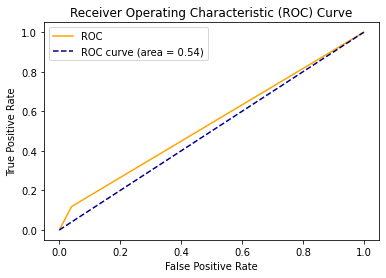

In [161]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# SVC learning model

In [162]:
svc = SVC()

In [163]:
svc.fit(x_train,y_train)


SVC()

In [164]:
svc_pred = svc.predict(x_test)


In [165]:
accuracy = accuracy_score(y_test,svc_pred)

In [166]:
accuracy

0.7240319606637984

In [167]:
confusion = confusion_matrix(y_test,svc_pred)


In [168]:
tp = confusion[0][0]
tn = confusion[1][1]
fp = confusion[0][1]
fn = confusion[1][0]

In [176]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
specificity=tn/(fp+tn)
F1_Score = (2*recall * precision) / (recall + precision)
    


In [205]:
accuracy


0.7618315918869084

In [204]:
F1_Score

0.8604106628242073

In [177]:
fpr, tpr, thresholds  = roc_curve(y_test,svc_pred)

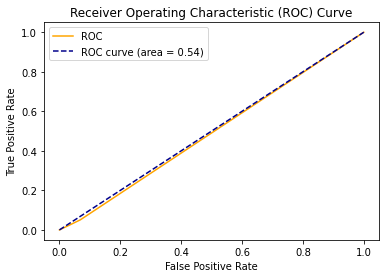

In [178]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [179]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


In [180]:
params = {'solver':['newton_cg','lbfgs','liblinear','sag','saga']}


In [181]:
grid = GridSearchCV(estimator=logistic,param_grid=params,cv=10,n_jobs=-1,verbose=True)


In [182]:
grid.fit(x_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [183]:
grid.best_estimator_

LogisticRegression()

In [184]:
grid.best_score_


0.8034117052310303

In [185]:
log_model = LogisticRegression(solver='sag')


In [186]:
log_model.fit(x_train,y_train)

LogisticRegression(solver='sag')

In [187]:
log_model_pred = log_model.predict(x_test)


In [188]:
log_model_pred = log_model.predict(x_test)


In [189]:
roc_auc_score(y_test,log_model_pred)

0.5391350752457656

In [191]:
confusion = confusion_matrix(y_test,log_model_pred)


In [192]:
tp = confusion[0][0]
tn = confusion[1][1]
fp = confusion[0][1]
fn = confusion[1][0]

In [193]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
specificity=tn/(fp+tn)
F1_Score = (2*recall * precision) / (recall + precision)

In [194]:
accuracy

0.7618315918869084

In [195]:
precision

0.9602010050251256

In [196]:
recall

0.779409365312449

In [198]:
F1_Score

0.8604106628242073

In [199]:
specificity

0.47757255936675463

In [200]:
fpr, tpr, thresholds  = roc_curve(y_test,log_model_pred)

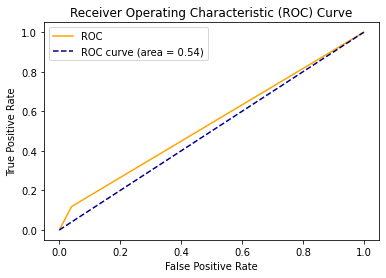

In [201]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [206]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_fscore_support



In [207]:
#to store n present all info at the end
i_Report =[]


#  Support Vector Classifier(SVC) model

In [208]:
model_svc = SVC()
model_svc

SVC()

In [209]:
model_svc.fit(x_train,y_train)

SVC()

In [210]:
test_score = model_svc.score(x_test, y_test)
pred = model_svc.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print (classification_report(y_test,pred))
p,r,f,s = precision_recall_fscore_support(y_test,pred, average='macro')
roc =roc_auc_score(y_test,pred)
print(f'1. Accuracy: {accuracy}\n2. ROC: {roc}:')
i_Report.append(['SVC Classifier',p,r,f,accuracy,roc])

[[4634  341]
 [1455   78]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      4975
           1       0.19      0.05      0.08      1533

    accuracy                           0.72      6508
   macro avg       0.47      0.49      0.46      6508
weighted avg       0.63      0.72      0.66      6508

1. Accuracy: 0.7240319606637984
2. ROC: 0.4911689563276264:


# Logistic Regression

In [211]:
model_logistic= LogisticRegression()
model_logistic


LogisticRegression()

In [212]:
model_logistic.fit(x_train,y_train)

LogisticRegression()

In [213]:
test_score = model_logistic.score(x_test, y_test)
log_test_pred = model_logistic.predict(x_test)
accuracy =accuracy_score(y_test,log_test_pred)
print(confusion_matrix(y_test, log_test_pred))
print (classification_report(y_test,log_test_pred))
p,r,f,s = precision_recall_fscore_support(y_test, log_test_pred, average='macro')
roc =roc_auc_score(y_test,log_test_pred)
print(f'1. Accuracy: {accuracy}\n2. ROC: {roc}:')
i_Report.append(['Logistic Regression',p,r,f,accuracy,roc])

[[4777  198]
 [1352  181]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4975
           1       0.48      0.12      0.19      1533

    accuracy                           0.76      6508
   macro avg       0.63      0.54      0.52      6508
weighted avg       0.71      0.76      0.70      6508

1. Accuracy: 0.7618315918869084
2. ROC: 0.5391350752457656:


# SVC Hypertuned model and GSCV


In [214]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear']}
grid = GridSearchCV(estimator = SVC(),
                           param_grid=param_grid,
                           cv=kfold,
                           refit = True,
                           verbose=2)
                    
grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  27.4s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  29.9s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  26.7s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  32.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  28.2s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  27.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  29.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  28.6s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  30.5s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  27.2s
[CV] END .......................C=10, gamma=1, kernel=linear; total time= 1.1min
[CV] END .......................C=10, gamma=1, ke

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1], 'kernel': ['linear']},
             verbose=2)

In [218]:
cv_score = grid.best_score_
g_pred = grid.predict(x_test)
accuracy =accuracy_score(y_test,g_pred)
cm = confusion_matrix(y_test, g_pred)
print(cm)
print (classification_report(y_test,g_pred))
p,r,f,s = precision_recall_fscore_support(y_test, g_pred, average='macro')
roc =roc_auc_score(y_test,g_pred)
print(f'1. Accuracy: {accuracy}\n2. ROC: {roc}\n3. Cross Val score:{cv_score}:')
i_Report.append(['SVCc Classifier Hypertuned',p,r,f,accuracy,roc])


[[4808  167]
 [1289  244]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4975
           1       0.59      0.16      0.25      1533

    accuracy                           0.78      6508
   macro avg       0.69      0.56      0.56      6508
weighted avg       0.74      0.78      0.72      6508

1. Accuracy: 0.7762753534111863
2. ROC: 0.5627985983406923
3. Cross Val score:0.7962657363870772:


# Store the Best Model in a pickle file

In [ ]:

pickle.dump(model1, open('svc.pkl','wb'))

# Here we can see that Support vector Classifier gives the highest accuracy of 72.4 per cent and F1 score of 86 per cent , making it the  most apt algorithm to be used further in predicting data about whether a persons income is less than or greater that $50k